In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pyximport
import h5py
from tqdm import tqdm
import time

pyximport.install(setup_args={'include_dirs': np.get_include()},reload_support=True)
from RigidWall_InertialLangevin3D_cython import RigidWallInertialLangevin3D

from mpl_toolkits import mplot3d
from scipy.signal import correlate
import matplotlib.gridspec as gridspec

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 140

mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 0.1
mpl.rcParams["figure.dpi"] = 130
from matplotlib import rc
rc('font', family='serif')
#rc('text', usetex=True)
rc('xtick', labelsize='x-small')
rc('ytick', labelsize='x-small')

In [2]:
nb_point = 7

i_max = nb_point+1
list_point = np.arange(2, i_max, 0.5)
time_calcul = np.zeros(len(list_point))
time_initialisation = np.zeros(len(list_point))
list_Nt =  np.zeros(len(list_point))
list_point
langevin3D = RigidWallInertialLangevin3D(dt=1e-6, Nt = 10, R=1.5e-6, rho=1050, x0=(0.0, 0.0, 1.0e-6))

for n, t in enumerate(tqdm(list_point)):
    Nt_i = int(10**t)
    
    tps1 = time.time()
    langevin3D.Nt = Nt_i
    tps2 = time.time()
    langevin3D.trajectory()
    tps3 = time.time()
    
    
    time_calcul[n] = tps3 - tps2
    time_initialisation[n] = tps2 - tps1
    list_Nt[n] = 10**t

time_calcul

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:34<00:00,  2.86s/it]


array([1.00731850e-03, 1.00159645e-03, 9.96589661e-04, 2.99692154e-03,
       7.99584389e-03, 2.55231857e-02, 7.64946938e-02, 2.38011122e-01,
       7.46484756e-01, 2.40049791e+00, 7.42999220e+00, 2.34024894e+01])

In [3]:
slope, intercept, r_value, p_value, std_err = stats.linregress(list_Nt, time_calcul)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: 0.000001    intercept: 0.008678


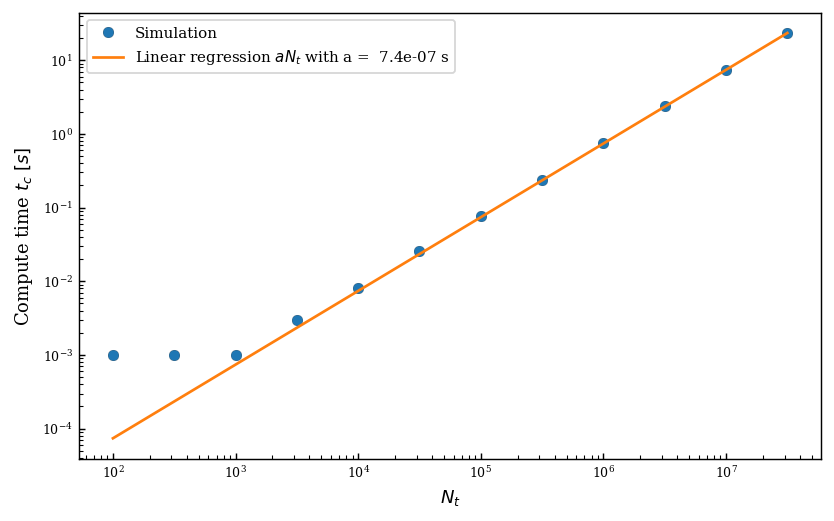

In [17]:
def cm2Inch(cm):
    inch = cm / 2.54
    return inch

w = cm2Inch(21 - 5)
h = cm2Inch((21 - 5)/1.618)
fig = plt.figure(constrained_layout=True, figsize=(w,h))
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)


plt.loglog(list_Nt, time_calcul, "o", label="Simulation")
plt.plot(list_Nt, list_Nt*slope, label="Linear regression $a N_t$ with a =  {:.1e} s".format(slope))
plt.xlabel("$N_t$")
plt.ylabel("Compute time $t_c$ $[s]$ ")
plt.legend(fontsize="small")
plt.savefig("Temps2Calcul_Fonction2_Nt.svg")